## 1- Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2- Loading Dataset

In [2]:
df = pd.read_csv("FuelConsumption.csv")

df.head(10)
# df["ENGINESIZE"].head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


## 3- EDA (Exploratory Data Analysis)

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


#### - Histogram Visualization

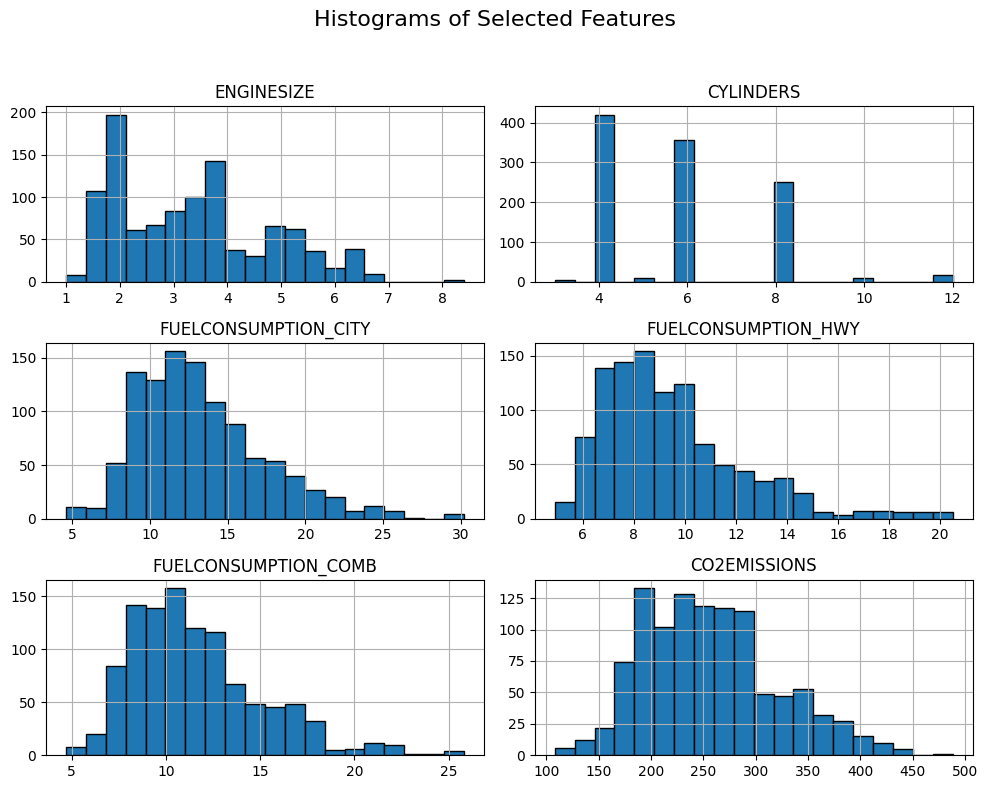

In [5]:
import matplotlib.pyplot as plt

viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

viz.hist(bins=20, figsize=(10, 8), edgecolor='black')
plt.suptitle('Histograms of Selected Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 4- Domain Expect
 - theoretical defense

#### Scatter Visualization (1)

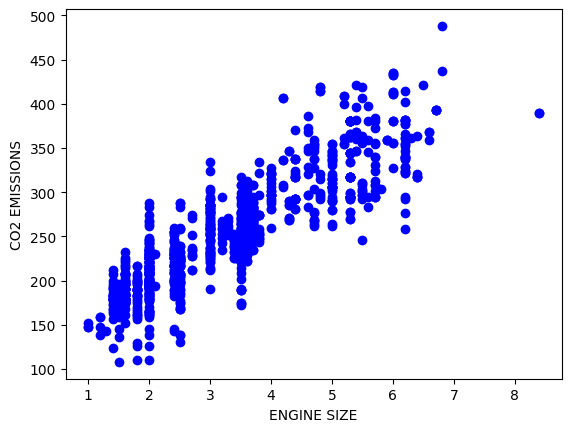

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")
plt.show()

#### Scatter Visualization (2)

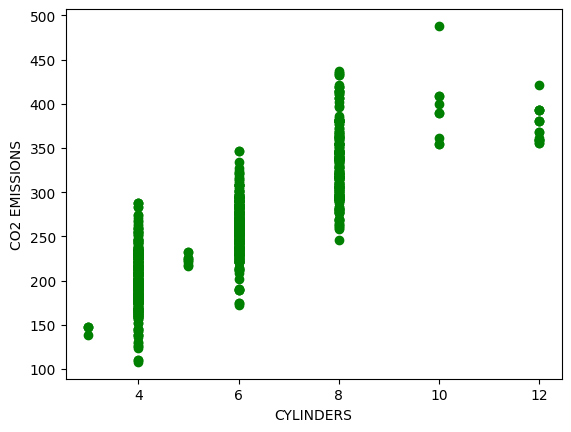

In [7]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color = 'green')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 EMISSIONS")
plt.show()

#### Scatter Visualization (3)

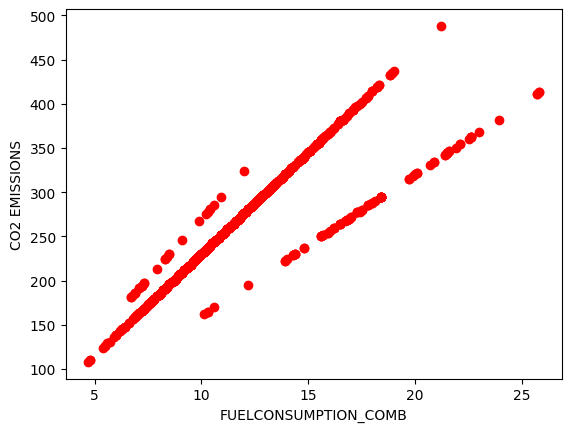

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 EMISSIONS")
plt.show()

## 5- Split data into Train & Test

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

print(msk)
print(~msk)
print("--------------------------- cdf -------------------------------")
print(cdf)
print("-------------------------- Train ---------------------------------")
print(train)
print("-------------------------- Test ----------------------------------")
print(test)

[ True  True  True ...  True  True  True]
[False False False ... False False False]
--------------------------- cdf -------------------------------
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0            2.0          4                   9.9                  6.7   
1            2.4          4                  11.2                  7.7   
2            1.5          4                   6.0                  5.8   
3            3.5          6                  12.7                  9.1   
4            3.5          6                  12.1                  8.7   
...          ...        ...                   ...                  ...   
1062         3.0          6                  13.4                  9.8   
1063         3.2          6                  13.2                  9.5   
1064         3.0          6                  13.4                  9.8   
1065         3.2          6                  12.9                  9.3   
1066         3.2          6           

## 6- Ploting Regression Model

### Train & Test Data Distribution

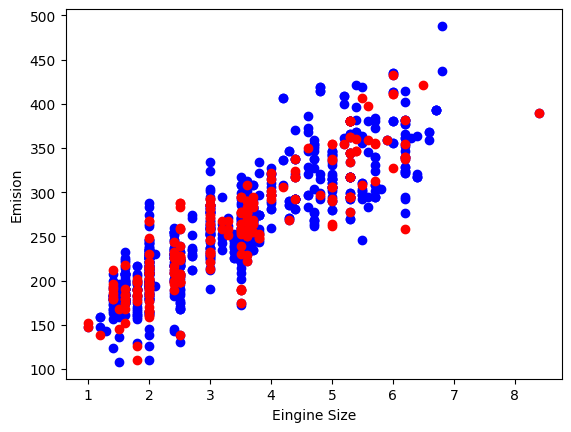

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
ax1.scatter(test.ENGINESIZE, test.CO2EMISSIONS, color = 'red')

plt.xlabel("Eingine Size")
plt.ylabel("Emision")
plt.show()

## 7- Linear Regression Model

In [11]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
reg.fit(x, y)

# The Coefficients
print('Coefficients: ',reg.coef_)
print('Intercepts: ',reg.intercept_)

Coefficients:  [[10.21005424  6.7927726  10.60043777]]
Intercepts:  [60.72843931]


### Model Visualization

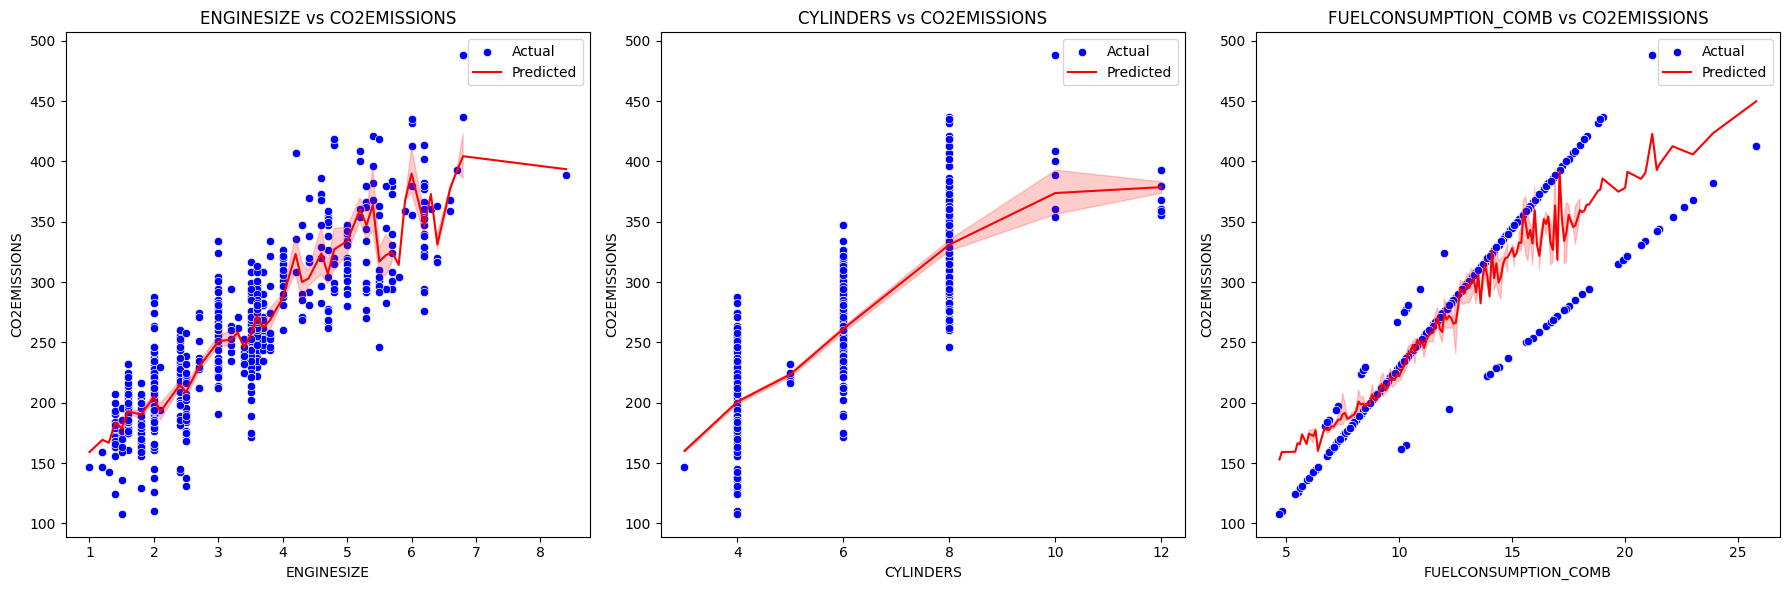

In [12]:
import seaborn as sns
y_pred = reg.predict(x)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# EngineSize vs Co2 Emissions
sns.scatterplot(ax=axes[0], x=train['ENGINESIZE'], y=train['CO2EMISSIONS'], color='blue', label='Actual')
sns.lineplot(ax=axes[0], x=train['ENGINESIZE'], y=y_pred.flatten(), color='red', label='Predicted')
axes[0].set_title('ENGINESIZE vs CO2EMISSIONS')
axes[0].set_xlabel('ENGINESIZE')
axes[0].set_ylabel('CO2EMISSIONS')

# CYLINDERS vs CO2EMISSIONS
sns.scatterplot(ax=axes[1], x=train['CYLINDERS'], y=train['CO2EMISSIONS'], color='blue', label='Actual')
sns.lineplot(ax=axes[1], x=train['CYLINDERS'], y=y_pred.flatten(), color='red', label='Predicted')
axes[1].set_title('CYLINDERS vs CO2EMISSIONS')
axes[1].set_xlabel('CYLINDERS')
axes[1].set_ylabel('CO2EMISSIONS')

# FUELCONSUMPTION_COMB vs CO2EMISSIONS
sns.scatterplot(ax=axes[2], x=train['FUELCONSUMPTION_COMB'], y=train['CO2EMISSIONS'], color='blue', label='Actual')
sns.lineplot(ax=axes[2], x=train['FUELCONSUMPTION_COMB'], y=y_pred.flatten(), color='red', label='Predicted')
axes[2].set_title('FUELCONSUMPTION_COMB vs CO2EMISSIONS')
axes[2].set_xlabel('FUELCONSUMPTION_COMB')
axes[2].set_ylabel('CO2EMISSIONS')

plt.tight_layout()
plt.show()

## 8- Evaluation Model

In [13]:
y_hat = reg.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residental Sum of Squares: %.2f" % np.mean((y_hat - y) ** 2))
print("Variance Score: %.2f" % reg.score(x, y))

Residental Sum of Squares: 675.85
Variance Score: 0.84


c:\Users\Asus\Desktop\ML\myvenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
